In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
n_obs = 50_000

In [3]:
np.random.seed(42)

c_1 = np.random.normal(size=n_obs).reshape(-1, 1)
c_2 = np.random.normal(size=n_obs).reshape(-1, 1)
c_3 = np.random.normal(size=n_obs).reshape(-1, 1)
c_4 = np.random.normal(size=n_obs).reshape(-1, 1)

intercept = np.ones(n_obs).reshape(-1, 1)

d_1 = np.copy(c_3)
d_1[0] += 0.001

d_2 = np.copy(c_1)
d_2[0] += 0.000000001

ac_1 = c_1 + c_2
ac_2 = c_1 + c_2 + c_3
ac_3 = c_1 + c_2 + c_3 + c_4

X = pd.DataFrame(data=np.hstack((c_1, c_2, c_3, c_4, d_1, d_2, ac_1, ac_2, ac_3, intercept)), columns=['c1', 'c2', 'c3', 'c4', 'd1', 'd2', 'ac1', 'ac2', 'ac3', 'intercept'])
y = np.ravel(c_1 + c_3) + np.random.normal(scale=0.1, size=n_obs)

In [4]:
X.describe()

,c1,c2,c3,c4,d1,d2,ac1,ac2,ac3,intercept
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0
mean,-0.000421,0.002355,0.003570,-0.001608,0.003570,-0.000421,0.001934,0.005504,0.003896,1.0
std,1.000170,1.001650,0.999576,0.998305,0.999576,1.000170,1.409781,1.732629,2.010253,0.0
min,-4.465604,-4.462969,-3.999332,-4.374043,-3.999332,-4.465604,-6.124308,-8.315105,-8.059446,1.0
25%,-0.678625,-0.669880,-0.671619,-0.675867,-0.671619,-0.678625,-0.954877,-1.155599,-1.362082,1.0
50%,0.001739,0.003720,0.003123,-0.002434,0.003123,0.001739,0.005456,0.008876,0.009512,1.0
75%,0.677060,0.676862,0.678093,0.671871,0.678093,0.677060,0.953002,1.170041,1.364411,1.0
max,4.479084,3.829782,4.562115,3.976868,4.562115,4.479084,5.554578,7.930651,8.183007,1.0


In [5]:
def linear_coeffs(X, y):
    coeffs = np.linalg.inv(X.T @ X) @ X.T @ y
    
    if isinstance(X, pd.DataFrame):
        coeffs.index = X.columns
    return coeffs

def predict(coeffs, X):
    return X @ coeffs

def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat - y_true))

## Caso base

In [6]:
linear_coeffs(X[['c1', 'c2', 'c3', 'intercept']], y)

c1           0.999840
c2           0.000256
c3           0.999496
intercept   -0.000267
dtype: float64

In [7]:
linear_coeffs(X[['intercept']], y)

intercept    0.002881
dtype: float64

## Cambiando rangos

2 x c_3

In [8]:
X_rg = X.copy()
X_rg['c3'] = 2 * X_rg['c3']

linear_coeffs(X_rg[['c1', 'c2', 'c3', 'intercept']], y)

c1           0.999840
c2           0.000256
c3           0.499748
intercept   -0.000267
dtype: float64

1000 x c_3 y 1000 x c1

In [53]:
X_rg = X.copy()
X_rg['c3'] = 1000 * X_rg['c3']
#X_rg['c1'] = 1000 * X_rg['c1']

linear_coeffs(X_rg[['c1', 'c2', 'c3', 'intercept']], y)

c1           0.999840
c2           0.000256
c3           0.000999
intercept   -0.000267
dtype: float64

## Colinealidades

In [54]:
X_c1 = X[['c1', 'd1', 'c3', 'intercept']]
coeffs_c1 = linear_coeffs(X_c1, y)

In [55]:
preds_c1 = predict(coeffs_c1, X_c1)
res_c1 = y - preds_c1

In [56]:
mae(y, preds_c1)

0.07985951559259298

In [57]:
r2_score(y, preds_c1)

0.9950318983542819

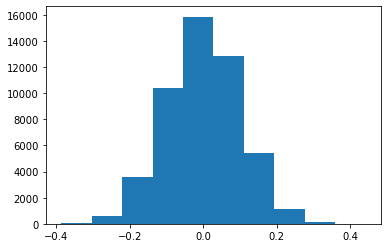

In [58]:
plt.hist(preds_c1 -  y);

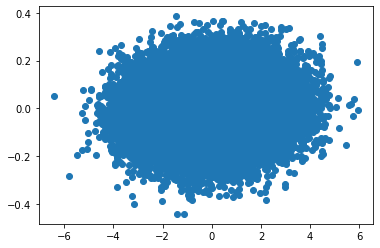

In [59]:
plt.scatter(y, res_c1)

In [60]:
res_c1.mean(), res_c1.std()

(-3.3688529077346984e-09, 0.10002380877679204)

**Funciona bastante bien el modelo.. no?**

In [61]:
obs = X_c1.loc[4]
obs

c1          -0.234153
d1          -0.327403
c3          -0.327403
intercept    1.000000
Name: 4, dtype: float64

In [62]:
predict(coeffs_c1, obs)

-0.561622149819646

In [63]:
y[4]

-0.5958212592256821

In [64]:
obs_prima = obs.copy()
obs_prima['d1'] = -obs_prima['d1']

In [65]:
predict(coeffs_c1, obs_prima)

102.28012743075669

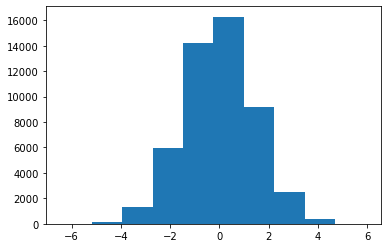

In [67]:
plt.hist(y);

Qué pasa?

In [68]:
coeffs_c1

c1             0.999836
d1           157.056915
c3          -156.057420
intercept     -0.000270
dtype: float64

In [69]:
X_c1_n = X_c1.drop(columns='intercept')
egvalues, egvectors = np.linalg.eig(X_c1_n.T @ X_c1_n)
egvalues

array([5.00152022e+04, 9.99153154e+04, 4.99984343e-07])

### Otros ejemplos

In [70]:
X_c2 = X[['c1', 'd2', 'c3', 'intercept']]
coeffs_c2 = linear_coeffs(X_c2, y)

In [71]:
preds_c2 = predict(coeffs_c2, X_c2)

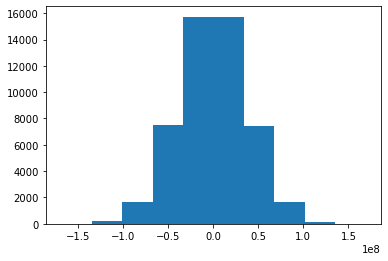

In [72]:
plt.hist(y-preds_c2);

In [73]:
coeffs_c2

c1           3.901010e+12
d2          -3.901047e+12
c3           1.077481e+00
intercept    7.688000e-02
dtype: float64

## Pero entonces la regresión lineal se puede utilizar con multicolinearidades o no??

In [74]:
def coefficients_sgd(X, y, l_rate, n_epoch, report_every=10):
    # https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
    coef = [0.0 for i in range(X.shape[1])]
    for epoch in range(n_epoch):
        sum_error = 0
        for x_v, y_v in zip(X, y):
            yhat = predict(coef, x_v)
            error = yhat - y_v
            sum_error += error**2
            for i in range(len(x_v)):
                coef[i] = coef[i] - l_rate * error * x_v[i]
        
        if epoch > 0 and epoch % report_every == 0:
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef

In [75]:
coeffs = coefficients_sgd(X_c2.values, y, l_rate = 0.001, n_epoch=4)

**Comprobamos los coeficientes y recordamos que y = c1 + c3 + N(0, 0.1), y que c5 =? c1** 

In [76]:
list(zip(X_c2.columns, coeffs))

[('c1', 0.5014257395818507),
 ('d2', 0.5014257395839927),
 ('c3', 1.00168679087208),
 ('intercept', 8.949999307435332e-05)]

In [77]:
coeffs_c2

c1           3.901010e+12
d2          -3.901047e+12
c3           1.077481e+00
intercept    7.688000e-02
dtype: float64

**La contribucion de c1 en y se ha dividido entre c1 y c5 (coeff ~ 0.5)**

## Vale.. y por que pasa esto?

Vamos a entender como se calculan los coeffs en OLS (Quitamos el intercept)

In [78]:
X_p1 = X[['c1', 'c2', 'c3']]
X_p2 = X[['c1', 'ac1', 'ac2', 'ac3']]

In [79]:
linear_coeffs(X_p1, y)

c1    0.999840
c2    0.000255
c3    0.999495
dtype: float64

Recordamos que se calculan como $(X'X)^{-1} X'y$ (Ecuacion normal regresion lineal multiple)

Vamos con la primera parte: $(X'X)$

In [80]:
M = X_p1.T @ X_p1
M

,c1,c2,c3
c1,50015.996776,-403.991722,140.796378
c2,-403.991722,50164.368738,243.702358
c3,140.796378,243.702358,49957.259386


$M_{ij} = <X{i},X{j}>$ lo cual se parece sospechosamente a la matriz de covarianzas!

In [81]:
norm_factor = 1 / (len(X_p1) - 1)
norm_factor * M

,c1,c2,c3
c1,1.000340,-0.008080,0.002816
c2,-0.008080,1.003307,0.004874
c3,0.002816,0.004874,0.999165


Si las features tienen media 0, entonces $X'X$ es proporcional a la matrix de covarianzas $\Sigma_{i,j} = Cov(X_i, X_j)$.
Nota: Al calcular la matrix de covarianzas multiplicamos por 1/(len(X)-1), pero como hacemos la inversa tenemos que recordar que $(kA)^{-1} = k^{-1}A^{-1}$

In [82]:
X_p1.cov()

,c1,c2,c3
c1,1.000340,-0.008079,0.002817
c2,-0.008079,1.003302,0.004866
c3,0.002817,0.004866,0.999152


Ahora con $(X'X)^{-1}$

In [35]:
M_inv = pd.DataFrame(np.linalg.inv(M), columns=M.columns, index=M.index)
M_inv

,c1,c2,c3
c1,1.999507e-05,1.613051e-07,-5.713971e-08
c2,1.613051e-07,1.993624e-05,-9.770793e-08
c3,-5.713971e-08,-9.770793e-08,2.001775e-05


Que tampoco nos dice mucho no?

In [36]:
((1 / norm_factor) * M_inv).round(2)

,c1,c2,c3
c1,1.00,0.01,-0.0
c2,0.01,1.00,-0.0
c3,-0.00,-0.00,1.0


Vale.. en este ejemplo todo sale "perfecto", veamos uno con colinearidades

In [37]:
M_p2 = (X_p2.T @ X_p2)
M_p2_inv = pd.DataFrame(np.linalg.inv(M_p2), columns=M_p2.columns, index=M_p2.index)
M_p2_inv

,c1,ac1,ac2,ac3
c1,3.960882e-05,-1.981579e-05,-8.577396e-09,4.894932e-08
ac1,-1.981579e-05,4.015009e-05,-1.999799e-05,-1.170018e-07
ac2,-8.577396e-09,-1.999799e-05,4.025072e-05,-2.015216e-05
ac3,4.894932e-08,-1.170018e-07,-2.015216e-05,2.007168e-05


Tampoco vemos mucho...

In [38]:
((1/norm_factor) * M_p2_inv).round(2)

,c1,ac1,ac2,ac3
c1,1.98,-0.99,-0.00,0.00
ac1,-0.99,2.01,-1.00,-0.01
ac2,-0.00,-1.00,2.01,-1.01
ac3,0.00,-0.01,-1.01,1.00


Y llegamos a la precision matrix! En esta matrix, $\Sigma^{-1}$, el elemento $\Sigma^{-1}_{i,j}$ nos dice si $i$ y $j$ son indepedendientes condionado a que conocemos el resto de variables

In [39]:
pd.DataFrame(np.linalg.inv(X_p2.cov()), columns=M_p2.columns, index=M_p2.index).round(2)

,c1,ac1,ac2,ac3
c1,1.98,-0.99,-0.00,0.00
ac1,-0.99,2.01,-1.00,-0.01
ac2,-0.00,-1.00,2.01,-1.01
ac3,0.00,-0.01,-1.01,1.00


Sigamos 

In [40]:
M_inv @ X_p1.T

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
c1,0.000010,-0.000003,0.000013,0.000031,-0.000005,-4.521137e-06,0.000032,0.000015,-0.000009,0.000011,...,0.000004,-0.000015,-0.000007,0.000030,-0.000049,0.000001,-6.012572e-07,0.000010,0.000005,0.000030
c2,0.000002,-0.000001,0.000019,0.000031,0.000014,2.012396e-05,-0.000004,0.000003,0.000029,0.000010,...,0.000013,0.000016,-0.000004,0.000004,0.000026,-0.000005,-1.138208e-05,0.000008,-0.000004,0.000003
c3,0.000021,-0.000023,0.000011,-0.000013,-0.000007,8.674729e-07,-0.000002,-0.000034,0.000028,0.000023,...,0.000027,-0.000009,0.000023,0.000027,-0.000016,0.000016,3.915812e-06,-0.000004,0.000003,0.000015


In [41]:
M_p2_inv @ X_p2.T

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
c1,0.000008,-0.000002,-0.000006,-6.238117e-08,-0.000018,-0.000025,0.000036,0.000013,-0.000039,3.615517e-07,...,-0.000009,-0.000031,-0.000003,0.000026,-0.000075,0.000006,0.000011,0.000002,0.000009,0.000028
ac1,-0.000019,0.000022,0.000008,4.333755e-05,0.000020,0.000019,-0.000002,0.000036,0.000002,-1.207732e-05,...,-0.000014,0.000025,-0.000028,-0.000023,0.000042,-0.000020,-0.000015,0.000012,-0.000007,-0.000013
ac2,-0.000007,-0.000021,0.000034,-4.020255e-05,-0.000004,0.000012,-0.000020,-0.000045,0.000025,3.489035e-05,...,0.000054,-0.000016,0.000040,0.000010,-0.000004,0.000041,-0.000008,-0.000007,-0.000014,0.000037
ac3,0.000027,-0.000002,-0.000022,2.745988e-05,-0.000002,-0.000011,0.000018,0.000011,0.000002,-1.221551e-05,...,-0.000027,0.000008,-0.000016,0.000017,-0.000012,-0.000025,0.000011,0.000003,0.000017,-0.000022


Interpretación (no rigurosa): Hemos descontado los efectos de las otras variables y ahora los coeficientes se pueden calcular por separado

Y como interpretamos esto?

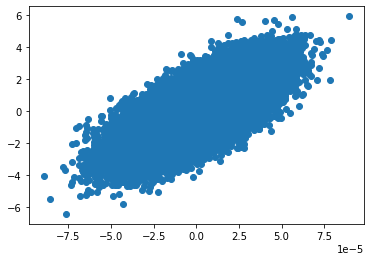

In [42]:
ax = plt.scatter((M_inv @ X_p1.T).loc['c1'], y)

In [43]:
(M_inv @ X_p1.T).loc['c1'] @  y

0.9998399914242844

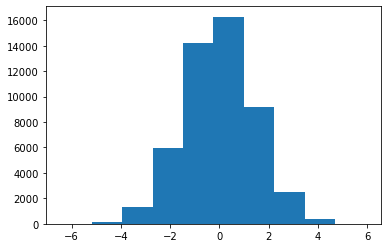

In [105]:
plt.hist(y);

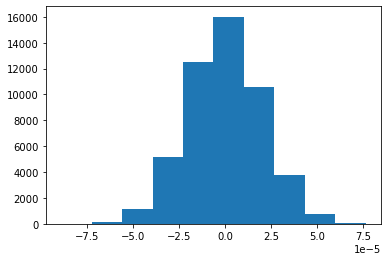

In [110]:
plt.hist((M_inv @ X_p1.T).loc['c2']);

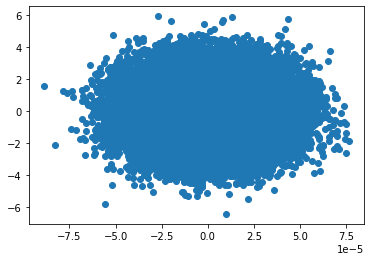

In [44]:
plt.scatter((M_inv @ X_p1.T).loc['c2'], y)

In [83]:
(M_inv @ X_p1.T).loc['c2'] @  y

0.0002549010007705196

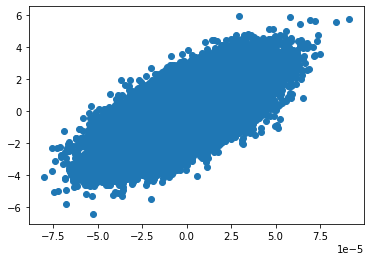

In [45]:
plt.scatter((M_inv @ X_p1.T).loc['c3'], y)

In [46]:
(M_inv @ X_p1.T).loc['c3'] @  y

0.9994950592392471

Y finalmente (recordando que y = c_1 + c_3 + N(0, 0.1))

In [47]:
coeffs_p1 = M_inv @ X_p1.T @ y
coeffs_p1

c1    0.999840
c2    0.000255
c3    0.999495
dtype: float64

Los coeficientes se calculan correctamente 

In [48]:
coeffs_p2 = M_p2_inv @ X_p2.T @ y
coeffs_p2

c1     0.999587
ac1   -0.999244
ac2    0.998874
ac3    0.000619
dtype: float64

En este caso nuestras variables explicativas tienen toda la informacion necesaria para calcular y, pero es un poco mas tedioso...:
* c1
* ac1=c1+c2
* ac2=c1+c2+c3
* ac3=c1+c2+c3+c4

En resumen:
* La contribución del coeficiente c1 es cancelada con ac1, que a su vez añade el efecto negativo c2
* El coeficiente ac2 añade c1, c2 y c3. La parte de c2 es cancelada por el efecto negativo sobre c2 de ac1
* El coeficience ac3 no aporta nada, ya que si lo hiciera, no tendríamos forma de cancelar el efecto sobre c4

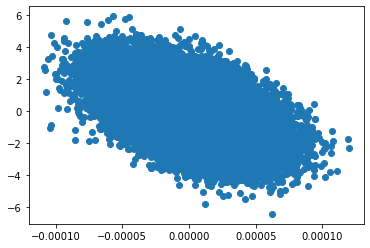

In [49]:
plt.scatter((M_p2_inv @ X_p2.T).loc['ac1'], y)

In [84]:
(M_p2_inv @ X_p2.T).loc['ac1'] @  y

-0.9992437664756181